In [46]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings
warnings.simplefilter("ignore")
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [47]:
#read data
df_dataset_1_ = pd.read_excel('dataset_1.xls')
df_dataset_2_ = pd.read_excel('dataset_2.xls')
df_dataset_3_ = pd.read_excel('dataset_3.xls')
df_dataset_4_ = pd.read_excel('dataset_4.xls')
df_dataset_5_ = pd.read_excel('dataset_5.xls')

In [48]:
# importing libraries
item_types = ['dataset_1', 'dataset_2', 'dataset_3', 'dataset_4', 'dataset_5']

In [49]:
# creating dictionary for sensors, temp, df_
sensor_a={}
sensor_b={}
temp={} 
df_={}

In [50]:
# function to create_dataframe
def create_dataframe(item):
  sensor_a[item] = eval('df_{}_'.format(item)).iloc[0:2688,0:5].div(10, axis=0)
  sensor_b[item] = eval('df_{}_'.format(item)).iloc[0:2688,84:89].div(1, axis=0)
  temp[item] = eval('df_{}_'.format(item)).iloc[0:2688,97:99].div(1, axis=0) 
  df_[item] = pd.concat([sensor_a[item],sensor_b[item],temp[item]], axis=1, sort=False)

In [51]:
#calling function to create_dataframe on each items
for item in item_types:
  create_dataframe(item)

In [52]:
# create item_dict for each item
item_dict = { item:{} for item in item_types}

In [53]:
# create dictionary function for each item
def creat_dict(item):
  row_start = 0
  row_end = 32
  df_name_counter = 1

  for i in range(1,6):
    item_dict[item]['input_{0}'.format(str(df_name_counter))] = df_[item].iloc[row_start:row_end,0:5].div(1, axis=0)
    item_dict[item]['sensor_{0}'.format(str(df_name_counter))] = df_[item].iloc[row_start:row_end,5:12].div(1, axis=0)
    item_dict[item]['df_{0}'.format(str(df_name_counter))] = pd.concat([item_dict[item]['input_{0}'.format(str(df_name_counter))], item_dict[item]['sensor_{0}'.format(str(df_name_counter))]], axis=1, sort=False)
    row_start = row_end
    row_end = row_end + 32
    df_name_counter += 1

In [54]:
# Calling create dictionary function for each item
for item in item_types:
  creat_dict(item)

In [55]:
# Output sensor and temperature dictionary with 15 dimensions
sen_dict = {}
df_name_counter = 1  

for i in range (1,6):
    sen_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    sen_dict["input_{0}".format(str(df_name_counter))] = pd.concat([item_dict[item]["sensor_{0}".format(str(df_name_counter))] for item in item_types])
    df_name_counter += 1 

In [56]:
# Scale data dictionary and Normalized dictionary
scaled_data_dict = {}
scaled_data_Normalizer_dict = {}
df_name_counter = 1  

for i in range (1,6):
  scaler = Normalizer()
  scaled_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
  scaled_data_dict["input_{0}".format(str(df_name_counter))] = scaler.fit_transform(sen_dict["input_{0}".format(str(df_name_counter))].values)
  scaled_data_Normalizer_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame(scaled_data_dict["input_{0}".format(str(df_name_counter))], 
                                                                                     columns = ['S_1', 'S_2','S_3', 'S_4','S_5','T_1','T_2'])
  df_name_counter += 1 


In [57]:
#  Reduced data dictionary
df_name_counter = 1  

for i in range (1,6):
    reduced_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    reduced_data_dict["input_{0}".format(str(df_name_counter))] = scaled_data_Normalizer_dict["input_{0}".format(str(df_name_counter))]
    reduced_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame(reduced_data_dict["input_{0}".format(str(df_name_counter))], 
                                                                               columns = ['S_1', 'S_2','S_3', 'S_4','S_5','T_1','T_2'])

    df_name_counter += 1

In [58]:
#  n clusers dictionary and adding data
df_name_counter = 1
range_n_clusters_data_dict = {}
for i in range (1,6):
    # Create range of clusters 
    range_n_clusters_data_dict["input_{0}".format(str(df_name_counter))] = list(range(2,6))
    df_name_counter += 1

In [59]:
# Apply 84 clustering models
cluster_data_dict = {}
pred_data_dict = {}
sample_pred_data_dict = {}
centers_data_dict = {}
score_data_dict = {}
labels_data_dict = {} 

df_name_counter = 1 

for i in range (1,6):
    for n_clusters in range_n_clusters_data_dict["input_{0}".format(str(df_name_counter))]:
        cluster_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
         
        model = KMeans(algorithm='auto', init='k-means++', max_iter=10000,n_clusters=n_clusters, n_jobs=None, precompute_distances='auto',random_state=0, tol=0.0001, verbose=0)
        
        #Train the model 
        cluster_data_dict["input_{0}".format(str(df_name_counter))] = model.fit(reduced_data_dict["input_{0}".format(str(df_name_counter))])
        
        pred_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].predict(scaled_data_Normalizer_dict["input_{0}".format(str(df_name_counter))])
        
        centers_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].cluster_centers_
        
        labels_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].labels_
        
        sample_pred_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].predict(scaled_data_Normalizer_dict["input_{0}".format(str(df_name_counter))])
       
        score_data_dict["input_{:02d}".format(df_name_counter)] = silhouette_score(reduced_data_dict["input_{0}".format(str(df_name_counter))], pred_data_dict["input_{0}".format(str(df_name_counter))], metric='euclidean')       
       
    df_name_counter += 1

In [60]:
def cluster_results(reduced_data, preds, centers):

	predictions = pd.DataFrame(pred_data_dict["input_{0}".format(str(df_name_counter))], columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data_dict["input_{0}".format(str(df_name_counter))]], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Set plot title
	ax.set_title("Clusters - Dataset 1,2,3,4,5 = INPUT No:{0}".format(str(df_name_counter)))

In [61]:
# Display the predictions
df_name_counter = 1 
for i in range (1,6):
    for i, (pred, sample) in enumerate(zip(sample_pred_data_dict["input_{0}".format(str(df_name_counter))], reduced_data_dict["input_{0}".format(str(df_name_counter))].values)):
        print( "Input No:{0}".format(str(df_name_counter)),"Sample point", i, "predicted to be in Cluster", pred)
        print ("Data for this sample: ", sample)
        print ("-----")
    df_name_counter += 1    

Sample point 39 predicted to be in Cluster 0
Data for this sample:  [0.14339569 0.29880841 0.20883758 0.16363697 0.15448591 0.62173685
 0.6397956 ]
-----
Input No:5 Sample point 40 predicted to be in Cluster 0
Data for this sample:  [0.14266803 0.29769632 0.20790077 0.16296749 0.1541267  0.62214307
 0.64064387]
-----
Input No:5 Sample point 41 predicted to be in Cluster 0
Data for this sample:  [0.14261827 0.29758773 0.20778634 0.16297707 0.15391562 0.622109
 0.64082389]
-----
Input No:5 Sample point 42 predicted to be in Cluster 0
Data for this sample:  [0.14317913 0.29873192 0.20868647 0.16357816 0.15460194 0.62115269
 0.64048317]
-----
Input No:5 Sample point 43 predicted to be in Cluster 0
Data for this sample:  [0.14280186 0.29785635 0.20807099 0.16315314 0.15400486 0.6221619
 0.64044813]
-----
Input No:5 Sample point 44 predicted to be in Cluster 0
Data for this sample:  [0.14266672 0.29761331 0.20774774 0.1628939  0.15403258 0.62231866
 0.64060317]
-----
Input No:5 Sample point 

In [62]:
#  Clusters input data dictionary
clusters_input_data_dict_train = {}
df_name_counter = 1
for i in range (1,6):
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['S_1'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['S_1']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['S_2'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['S_2']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['S_3'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['S_3']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['S_4'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['S_4']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['S_5'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['S_5']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['T_1'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['T_1']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['T_2'] = reduced_data_dict["input_{0}".format(str(df_name_counter))]['T_2']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['Input Number'] = df_name_counter
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['Cluster'] = sample_pred_data_dict["input_{0}".format(str(df_name_counter))]
    
    df_name_counter += 1


In [63]:
# kmeans train
alldb_kmean_clusters_train = pd.DataFrame()
alldb_kmean_clusters_train = [clusters_input_data_dict_train['input_2'],
                              clusters_input_data_dict_train['input_3'],
                              clusters_input_data_dict_train['input_4'],
                              clusters_input_data_dict_train['input_5']]
 
alldb_kmean_clusters_train = pd.concat(alldb_kmean_clusters_train)   

In [64]:
d1 = alldb_kmean_clusters_train.iloc[:,0:1].div(1, axis=0) 
d2 = alldb_kmean_clusters_train.iloc[:,1:2].div(1, axis=0) 
d3 = alldb_kmean_clusters_train.iloc[:,2:3].div(1, axis=0) 
d4 = alldb_kmean_clusters_train.iloc[:,3:4].div(1, axis=0) 
d5 = alldb_kmean_clusters_train.iloc[:,4:5].div(1, axis=0) 
d6 = alldb_kmean_clusters_train.iloc[:,5:6].div(1, axis=0) 
d7 = alldb_kmean_clusters_train.iloc[:,6:7].div(1, axis=0) 
input = alldb_kmean_clusters_train.iloc[:,7:8].div(1, axis=0)
label = alldb_kmean_clusters_train.iloc[:,8:9].div(1, axis=0)

Training set score: 0.954167
Test set score: 0.937500
--- 1.4235670566558838 Seconds ---
------------------------------------------------------------

[[27  0  0  0  0]
 [ 0 42  0  0  0]
 [ 0  0 29  0  0]
 [ 0  0 10 16  0]
 [ 0  0  0  0 36]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        42
         2.0       0.74      1.00      0.85        29
         3.0       1.00      0.62      0.76        26
         4.0       1.00      1.00      1.00        36

    accuracy                           0.94       160
   macro avg       0.95      0.92      0.92       160
weighted avg       0.95      0.94      0.93       160


------------------------------------------------------------


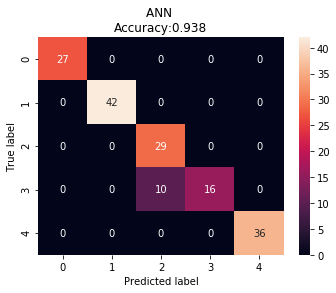

In [66]:
Supervised_Training_db_sens_temp_org_dimens= pd.concat([d1,d2,d3,d4,d5,d6,d7,input,label], axis=1, sort=False)

df_cls = Supervised_Training_db_sens_temp_org_dimens
X=df_cls.iloc[:,0:8].values
y=df_cls.iloc[:,8:9].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
start_time = time.time()
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 11), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
clf.fit(X_train, y_train)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
print("--- %s Seconds ---" % (time.time() - start_time))
print("------------------------------------------------------------")
print()
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print()
print("------------------------------------------------------------")

y_mlp_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_mlp_pred) 
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('ANN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_mlp_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show() 